# Chronic Disease Indicators Analysis

# Dataset Source: CDC Chronic Disease Indicators

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('chronic_disease.csv')
print(df)

        YearStart  YearEnd LocationAbbr    LocationDesc DataSource  \
0            2019     2019           AR        Arkansas      BRFSS   
1            2019     2019           ID           Idaho      BRFSS   
2            2019     2019           IN         Indiana      YRBSS   
3            2019     2019           IA            Iowa       NVSS   
4            2019     2019           IA            Iowa      BRFSS   
...           ...      ...          ...             ...        ...   
309210       2022     2022           VI  Virgin Islands      BRFSS   
309211       2022     2022           WV   West Virginia      BRFSS   
309212       2022     2022           WI       Wisconsin      BRFSS   
309213       2022     2022           VT         Vermont      BRFSS   
309214       2022     2022           WA      Washington      BRFSS   

                                        Topic  \
0                                    Diabetes   
1                                    Diabetes   
2           

In [6]:
df.shape

(309215, 34)

In [7]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying ...",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [9]:
df.describe()

,YearStart,YearEnd,Response,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID,ResponseID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,309215.000000,309215.000000,0.0,2.091960e+05,2.091960e+05,188885.000000,188890.000000,0.0,0.0,0.0,0.0,309215.000000,0.0,0.0,0.0,0.0,0.0
mean,2020.012195,2020.288540,NaN,6.943569e+02,7.356701e+02,36.825051,46.030554,NaN,NaN,NaN,NaN,31.208693,NaN,NaN,NaN,NaN,NaN
std,1.530835,1.068591,NaN,1.620341e+04,1.834715e+04,65.025590,69.995643,NaN,NaN,NaN,NaN,17.798773,NaN,NaN,NaN,NaN,NaN
min,2015.000000,2019.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2019.000000,2019.000000,NaN,1.240000e+01,1.240000e+01,9.100000,14.000000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN
50%,2020.000000,2020.000000,NaN,2.700000e+01,2.700000e+01,19.500000,29.200000,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN
75%,2021.000000,2021.000000,NaN,5.780000e+01,5.780000e+01,40.300000,54.300000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN
max,2022.000000,2022.000000,NaN,2.925456e+06,2.925456e+06,1427.000000,1485.900000,NaN,NaN,NaN,NaN,78.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
for i in df.columns:
    print(i)

YearStart
YearEnd
LocationAbbr
LocationDesc
DataSource
Topic
Question
Response
DataValueUnit
DataValueType
DataValue
DataValueAlt
DataValueFootnoteSymbol
DataValueFootnote
LowConfidenceLimit
HighConfidenceLimit
StratificationCategory1
Stratification1
StratificationCategory2
Stratification2
StratificationCategory3
Stratification3
Geolocation
LocationID
TopicID
QuestionID
ResponseID
DataValueTypeID
StratificationCategoryID1
StratificationID1
StratificationCategoryID2
StratificationID2
StratificationCategoryID3
StratificationID3


In [11]:
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     309215
DataValueUnit                     0
DataValueType                     0
DataValue                    100019
DataValueAlt                 100019
DataValueFootnoteSymbol      207499
DataValueFootnote            207499
LowConfidenceLimit           120330
HighConfidenceLimit          120325
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      309215
Stratification2              309215
StratificationCategory3      309215
Stratification3              309215
Geolocation                    5763
LocationID                        0
TopicID                           0
QuestionID                        0
ResponseID                   309215
DataValueTypeID             

# Now i m going to clean the data
# and i will save it to the new variable df_clean

In [12]:
# step_1 : 

# i keep only rows from year 2020 and later
# latest data

df_clean = df[df['YearStart'] >= 2020]

In [13]:
# step_2 : 

# i m only keeping necessory columns, i deleted all the unnecessory columns / useless columns / dirty columns

df_clean = df_clean[['YearStart','LocationAbbr','LocationDesc', 'Topic','Question','DataValue','DataValueType','DataValueUnit','Stratification1']]

In [14]:
# step_3 :

# it removes all rows from df_clean 
# where any column has a missing value (NaN)

df_clean.dropna(inplace=True)

In [15]:
df_clean.reset_index(drop=True, inplace=True)

# for reseting the index 
# and i used "inplace=True" for changing in directly original dataframe df_clean

In [16]:
df_clean.duplicated().sum()

# there is not a single duplicate left in df_clean
# so there is no need to drop duplicate rows

np.int64(0)

# now data is so clean, and dont have any missing values

# now i m going to write whole the summary for the new clean data (df_clean)

In [17]:
df_clean.shape

(134695, 9)

In [18]:
df_clean.head()

,YearStart,LocationAbbr,LocationDesc,Topic,Question,DataValue,DataValueType,DataValueUnit,Stratification1
0,2020,ME,Maine,Mental Health,Depression among adults,16.0,Crude Prevalence,%,Male
1,2020,NE,Nebraska,Tobacco,Current cigarette smoking among adults,15.6,Crude Prevalence,%,Male
2,2020,NV,Nevada,Alcohol,Chronic liver disease mortality among all peop...,98.0,Number,Number,Hispanic
3,2020,NV,Nevada,Asthma,Current asthma among adults,8.0,Crude Prevalence,%,Age 18-44
4,2020,NH,New Hampshire,Disability,Adults with any disability,16.9,Crude Prevalence,%,Age 18-44


In [19]:
df_clean.tail()

,YearStart,LocationAbbr,LocationDesc,Topic,Question,DataValue,DataValueType,DataValueUnit,Stratification1
134690,2022,VT,Vermont,Sleep,Short sleep duration among adults,26.5,Crude Prevalence,%,"Asian, non-Hispanic"
134691,2022,VI,Virgin Islands,Immunization,Influenza vaccination among adults,34.2,Crude Prevalence,%,Age >=65
134692,2022,WV,West Virginia,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among ad...,14.0,Crude Prevalence,%,Overall
134693,2022,WI,Wisconsin,Immunization,Pneumococcal vaccination among adults aged 65 ...,64.2,Crude Prevalence,%,"Black, non-Hispanic"
134694,2022,WA,Washington,Alcohol,Binge drinking prevalence among adults,19.2,Age-adjusted Prevalence,%,Male


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134695 entries, 0 to 134694
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YearStart        134695 non-null  int64  
 1   LocationAbbr     134695 non-null  object 
 2   LocationDesc     134695 non-null  object 
 3   Topic            134695 non-null  object 
 4   Question         134695 non-null  object 
 5   DataValue        134695 non-null  float64
 6   DataValueType    134695 non-null  object 
 7   DataValueUnit    134695 non-null  object 
 8   Stratification1  134695 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


In [21]:
df_clean.isnull().sum()

YearStart          0
LocationAbbr       0
LocationDesc       0
Topic              0
Question           0
DataValue          0
DataValueType      0
DataValueUnit      0
Stratification1    0
dtype: int64

In [22]:
df_clean.describe()

,YearStart,DataValue
count,134695.000000,1.346950e+05
mean,2020.882497,5.401012e+02
std,0.744166,1.294368e+04
min,2020.000000,0.000000e+00
25%,2020.000000,1.170000e+01
50%,2021.000000,2.555000e+01
75%,2021.000000,5.430000e+01
max,2022.000000,2.474807e+06


In [23]:
df_clean.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Topic', 'Question',
       'DataValue', 'DataValueType', 'DataValueUnit', 'Stratification1'],
      dtype='object')

# i m changing the last colum "Stratification1" to a more 
# meaningful name "DemographicCategory"

In [24]:
# i m changing the last colum "Stratification1" to a more 
# meaningful name "DemographicCategory"

In [25]:
df_clean.rename(columns={'Stratification1': 'DemographicCategory'}, inplace=True)

In [26]:
df_clean.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Topic', 'Question',
       'DataValue', 'DataValueType', 'DataValueUnit', 'DemographicCategory'],
      dtype='object')

# now i m fiding some insights from the dataframe df_clean

In [27]:
df_clean['Topic'].values

array(['Mental Health', 'Tobacco', 'Alcohol', ...,
       'Chronic Obstructive Pulmonary Disease', 'Immunization', 'Alcohol'],
      shape=(134695,), dtype=object)

In [28]:
df_clean['Topic'].value_counts()

# it will tell us which health issue are 
# the most commonly reported


# like we will know that how many people have 
# reported abbout a particular health issue

Topic
Cardiovascular Disease                             14461
Health Status                                      14357
Chronic Obstructive Pulmonary Disease              12445
Nutrition, Physical Activity, and Weight Status    11536
Alcohol                                            11474
Immunization                                        9266
Mental Health                                       9004
Social Determinants of Health                       8783
Diabetes                                            7805
Oral Health                                         7745
Arthritis                                           6529
Tobacco                                             6112
Asthma                                              3811
Sleep                                               3121
Disability                                          3054
Cancer                                              2567
Cognitive Health and Caregiving                     2231
Maternal Health          

# Most Reported Health Issues (by Count)

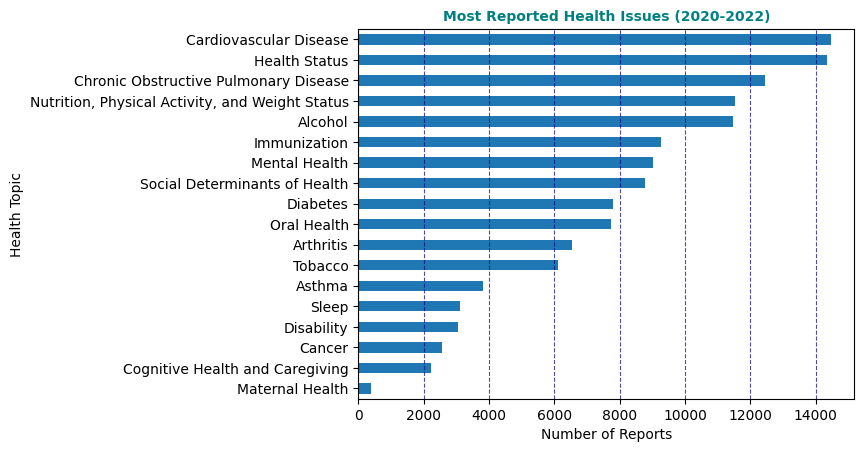

In [29]:
topic_counts = df_clean['Topic'].value_counts().sort_values(ascending=True)
topic_counts.plot(kind='barh')
plt.title('Most Reported Health Issues (2020-2022)', fontsize=10, weight='bold', color='#008080')
plt.xlabel('Number of Reports')
plt.ylabel('Health Topic')
plt.grid(axis='x', linestyle='--', alpha=0.7, c='#000080')
plt.show()


In [30]:
# percentage wise health issue reported from 2020 to 2022 in the US

df_clean['Topic'].value_counts(normalize=True)*100



Topic
Cardiovascular Disease                             10.736108
Health Status                                      10.658896
Chronic Obstructive Pulmonary Disease               9.239393
Nutrition, Physical Activity, and Weight Status     8.564535
Alcohol                                             8.518505
Immunization                                        6.879246
Mental Health                                       6.684732
Social Determinants of Health                       6.520658
Diabetes                                            5.794573
Oral Health                                         5.750028
Arthritis                                           4.847247
Tobacco                                             4.537659
Asthma                                              2.829355
Sleep                                               2.317087
Disability                                          2.267345
Cancer                                              1.905787
Cognitive Health a

# Most Reported Health Issues (by %)
# or
# Health Issues by Percentage of Total Reports

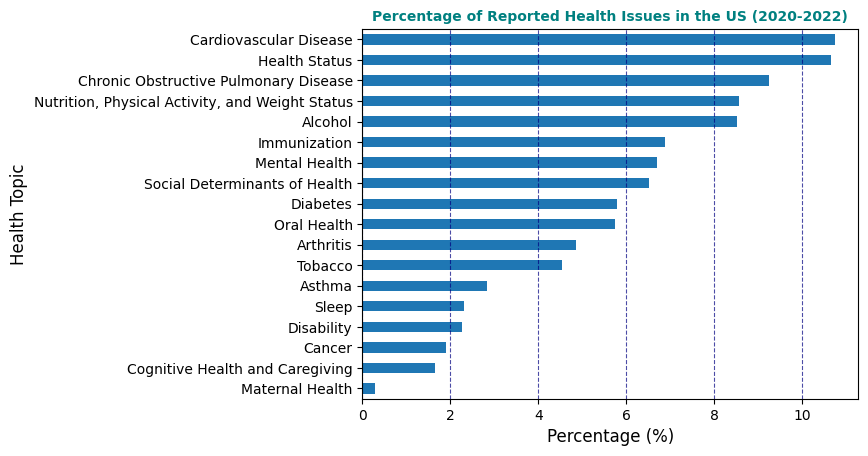

In [31]:
import matplotlib.pyplot as plt

topic_percent = df_clean['Topic'].value_counts(normalize=True).sort_values(ascending=True) * 100

topic_percent.plot(kind='barh')
# or
# plt.barh(topic_percent.index, topic_percent.values)

plt.title('Percentage of Reported Health Issues in the US (2020-2022)', fontsize=10, weight='bold', color='#008080')
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Health Topic', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7, c='#000080')
plt.show()


In [32]:
df_clean['LocationDesc'].value_counts()

# no. of patients location wise

LocationDesc
United States           3295
Washington              3106
New York                3005
Arizona                 2905
Minnesota               2840
Texas                   2835
Kansas                  2814
Hawaii                  2798
California              2772
Oklahoma                2767
Maryland                2762
New Jersey              2741
Colorado                2739
Michigan                2719
Georgia                 2709
Virginia                2709
Missouri                2695
Massachusetts           2690
North Carolina          2661
Indiana                 2655
Ohio                    2652
Wisconsin               2638
Connecticut             2611
Pennsylvania            2563
South Carolina          2556
Utah                    2550
New Mexico              2536
Nebraska                2517
Tennessee               2494
Oregon                  2490
Illinois                2468
Iowa                    2461
Nevada                  2461
Arkansas                2433
L

In [33]:
df_clean['DemographicCategory'].value_counts()

DemographicCategory
Overall                                           17377
White, non-Hispanic                               16480
Female                                            15980
Male                                              15958
Hispanic                                          12536
Black, non-Hispanic                               12135
Multiracial, non-Hispanic                          8164
Age 45-64                                          7239
Age >=65                                           6275
American Indian or Alaska Native, non-Hispanic     6203
Asian, non-Hispanic                                5601
Age 18-44                                          5432
Age 0-44                                           1150
Hawaiian or Pacific Islander, non-Hispanic          987
Asian or Pacific Islander, non-Hispanic             634
Grade 9                                             506
Grade 10                                            506
Grade 12                    

In [34]:
df_clean.nunique()

# i m finding no. of unique entries in each column

# like how many different years
# how many different states/location
# ........

YearStart                  3
LocationAbbr              55
LocationDesc              55
Topic                     18
Question                  99
DataValue              10332
DataValueType             11
DataValueUnit              6
DemographicCategory       26
dtype: int64

In [35]:
df_clean.groupby('Topic')['DataValueUnit'].unique()

Topic
Alcohol                                                    [Number, %, cases per 100,000, gallons]
Arthritis                                                                                      [%]
Asthma                                                              [%, Number, cases per 100,000]
Cancer                                                                                         [%]
Cardiovascular Disease                             [Number, cases per 1,000, cases per 100,000, %]
Chronic Obstructive Pulmonary Disease              [cases per 1,000, %, Number, cases per 100,000]
Cognitive Health and Caregiving                                                                [%]
Diabetes                                                            [%, Number, cases per 100,000]
Disability                                                                                     [%]
Health Status                                                                   [%, Number, Years]
Immu

In [36]:
df_clean['DataValueUnit'].value_counts()

DataValueUnit
%                    93093
Number               23442
cases per 100,000    13754
cases per 1,000       4146
Years                  156
gallons                104
Name: count, dtype: int64

# Average % Value for Each Health Topic

In [37]:
df_percent = df_clean[df_clean['DataValueUnit'] == '%']

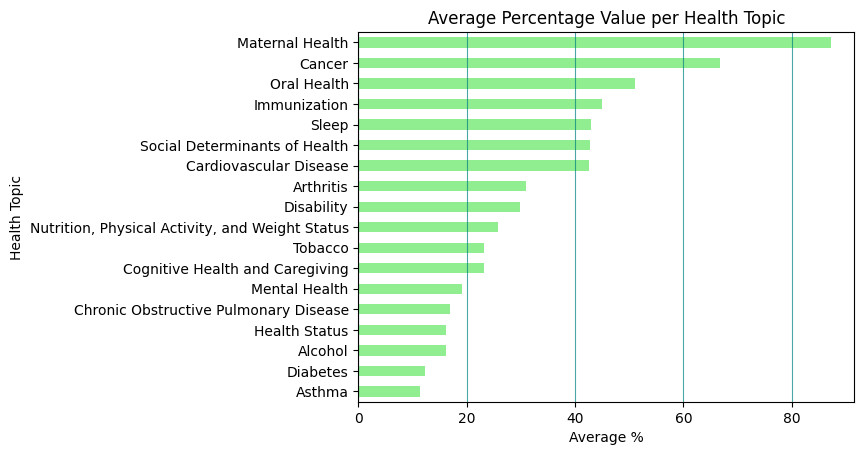

In [38]:
avg_percent_by_topic = df_percent.groupby('Topic')['DataValue'].mean().sort_values()
avg_percent_by_topic.plot(kind='barh', color='lightgreen')
plt.title('Average Percentage Value per Health Topic')
plt.xlabel('Average %')
plt.ylabel('Health Topic')
plt.grid(axis='x', alpha=0.7, c='#008080')
plt.show()






# Compare Health Data by Gender / Age / Race (DemographicCategory)

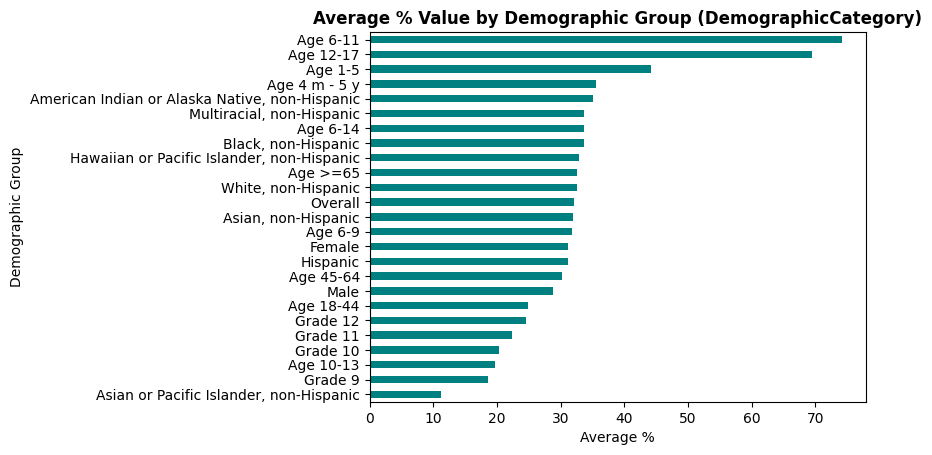

In [39]:
avg_percent_by_demographic_group = df_percent.groupby('DemographicCategory')['DataValue'].mean().sort_values()
avg_percent_by_demographic_group.plot(kind='barh', color='#008080')
plt.title('Average % Value by Demographic Group (DemographicCategory)', weight='bold')
plt.xlabel('Average %')
plt.ylabel('Demographic Group')
plt.show()


# Top 10 Reported Topics in Each State

In [40]:
top_topics_state = df_clean.groupby(['LocationAbbr', 'Topic']).size()
print(top_topics_state)

LocationAbbr  Topic                                          
AK            Alcohol                                            190
              Arthritis                                          126
              Asthma                                              48
              Cancer                                              48
              Cardiovascular Disease                             264
                                                                ... 
WY            Nutrition, Physical Activity, and Weight Status    137
              Oral Health                                        116
              Sleep                                               40
              Social Determinants of Health                      156
              Tobacco                                             67
Length: 976, dtype: int64


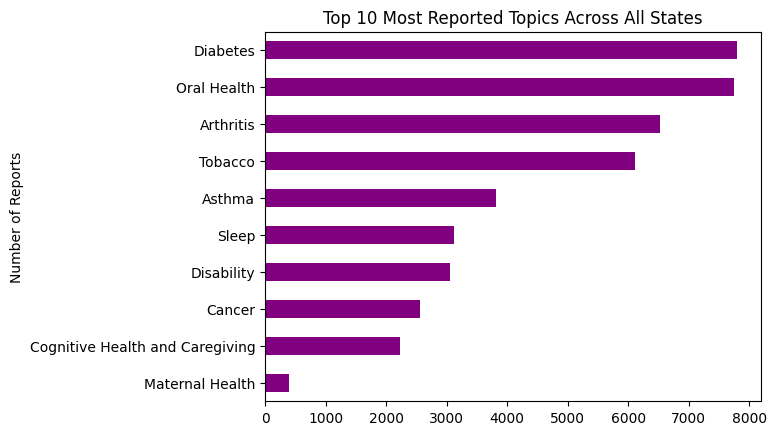

In [41]:
top_topics_state = df_clean.groupby(['LocationAbbr', 'Topic']).size().unstack().fillna(0)
top_topics_state.sum().sort_values(ascending=True).head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Most Reported Topics Across All States')
plt.ylabel('Number of Reports')
plt.show()


# Trend Over Time (2020-2022)

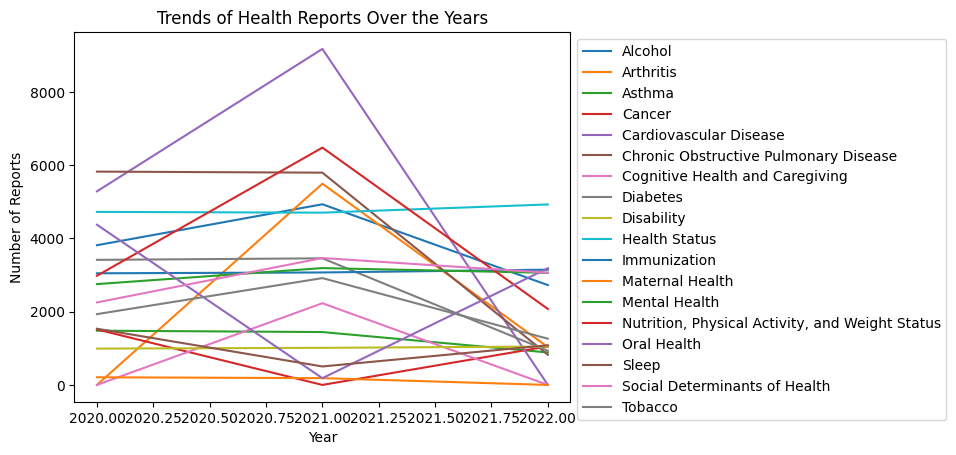

In [42]:
yearly_counts = df_clean.groupby(['YearStart', 'Topic']).size().unstack().fillna(0)
yearly_counts.plot()
plt.title('Trends of Health Reports Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 1.0))
plt.show()

# Heatmap: Top 5 Topics in Each State

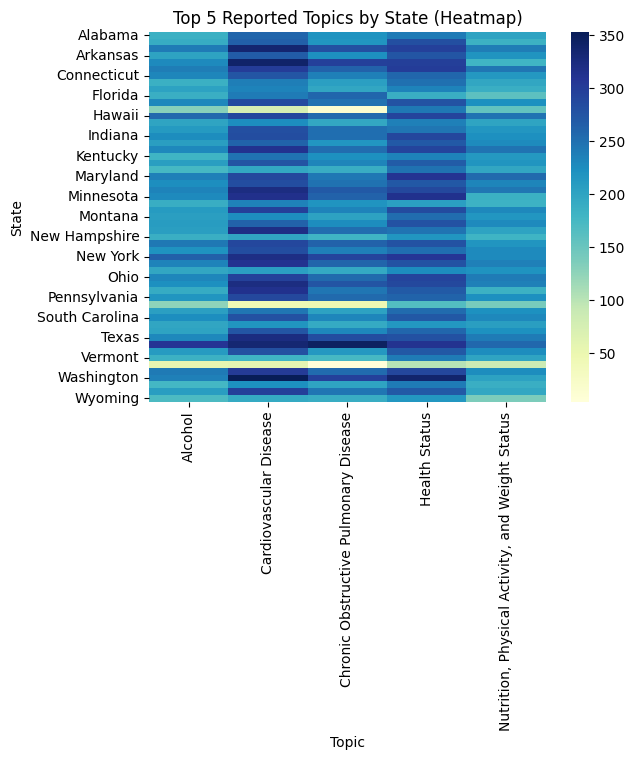

In [43]:
import seaborn as sns

top_5_topics = df_clean['Topic'].value_counts().head(5).index
filtered = df_clean[df_clean['Topic'].isin(top_5_topics)]
heatmap_data = filtered.groupby(['LocationDesc', 'Topic']).size().unstack().fillna(0)

sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Top 5 Reported Topics by State (Heatmap)')
plt.ylabel('State')
plt.xlabel('Topic')
plt.show()


# DataValue Distribution (Boxplot)

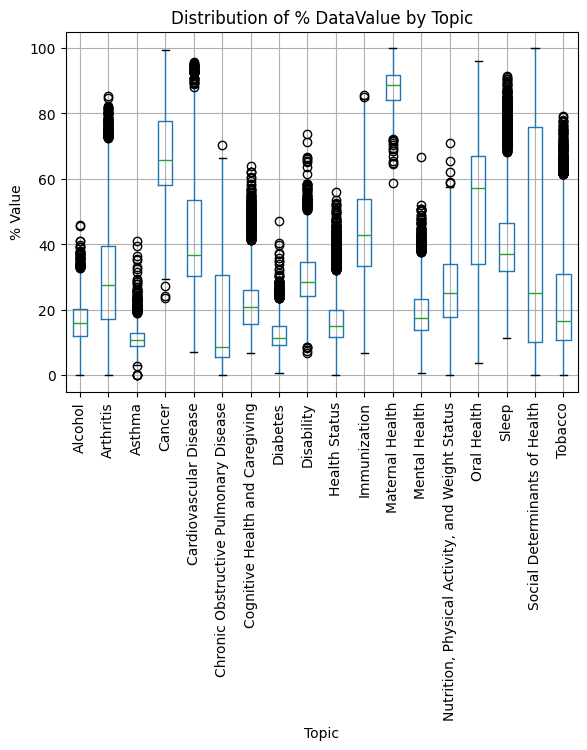

In [44]:
df_percent.boxplot(column='DataValue', by='Topic', rot=90)
plt.title('Distribution of % DataValue by Topic')
plt.suptitle('')
plt.ylabel('% Value')
plt.show()


#  Compare Specific Topics (e.g., Alcohol vs Tobacco)

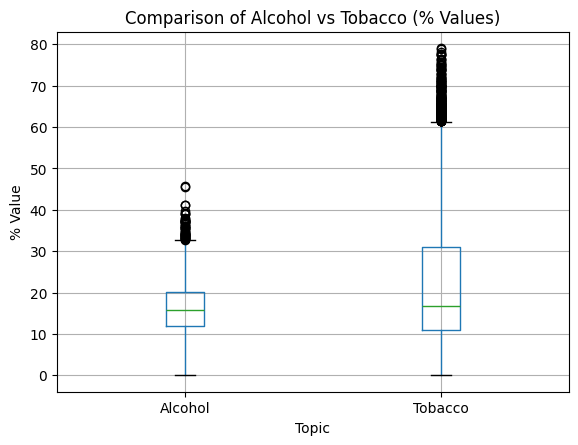

In [45]:
topics_to_compare = ['Alcohol', 'Tobacco']
compare_df = df_percent[df_percent['Topic'].isin(topics_to_compare)]

compare_df.boxplot(column='DataValue', by='Topic')
plt.title('Comparison of Alcohol vs Tobacco (% Values)')
plt.ylabel('% Value')
plt.suptitle('')
plt.show()

#  Which Topics Got the Most Attention

C:\Users\shahn\AppData\Local\Temp\ipykernel_15068\2368988095.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Topic', data=df_clean, order=df_clean['Topic'].value_counts().index, palette='viridis')


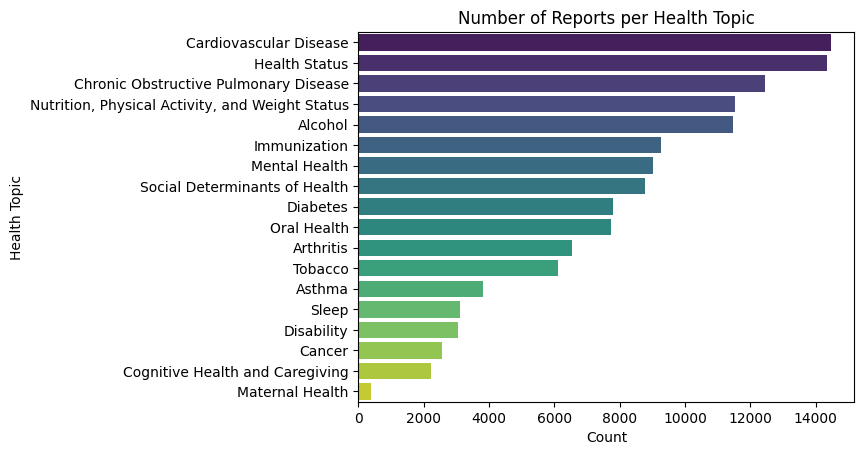

In [46]:
sns.countplot(y='Topic', data=df_clean, order=df_clean['Topic'].value_counts().index, palette='viridis')
plt.title("Number of Reports per Health Topic")
plt.xlabel("Count")
plt.ylabel("Health Topic")
plt.show()


# Which health issues were most reported?

C:\Users\shahn\AppData\Local\Temp\ipykernel_15068\3883059713.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')


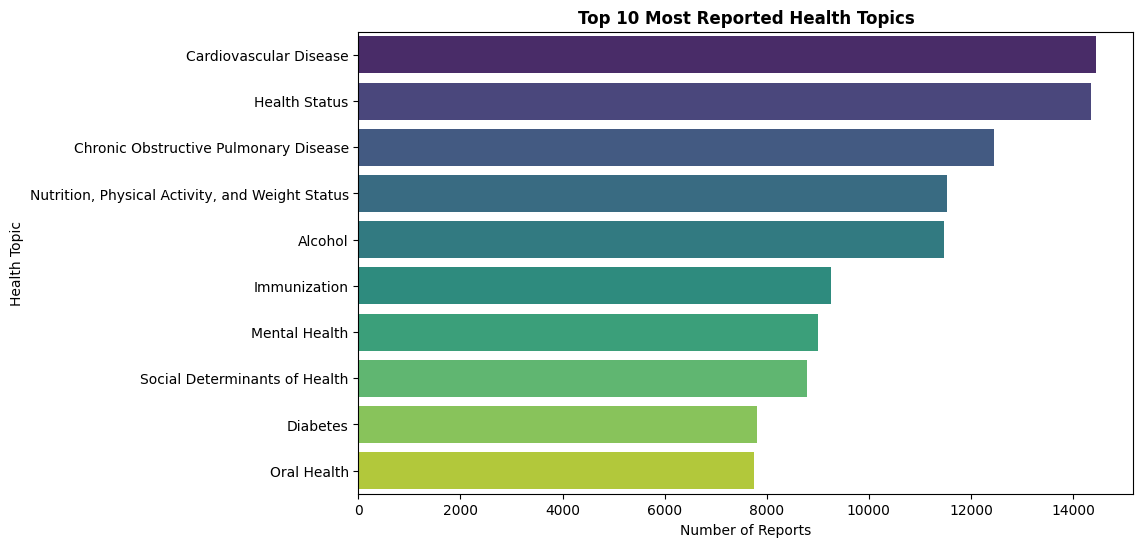

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

topic_counts = df_clean['Topic'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')
plt.title("Top 10 Most Reported Health Topics", weight='bold')
plt.xlabel("Number of Reports")
plt.ylabel("Health Topic")
plt.show()


# What are the most affected demographic groups?

C:\Users\shahn\AppData\Local\Temp\ipykernel_15068\1038376779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_percent_by_demo.values, y=avg_percent_by_demo.index, palette='coolwarm')


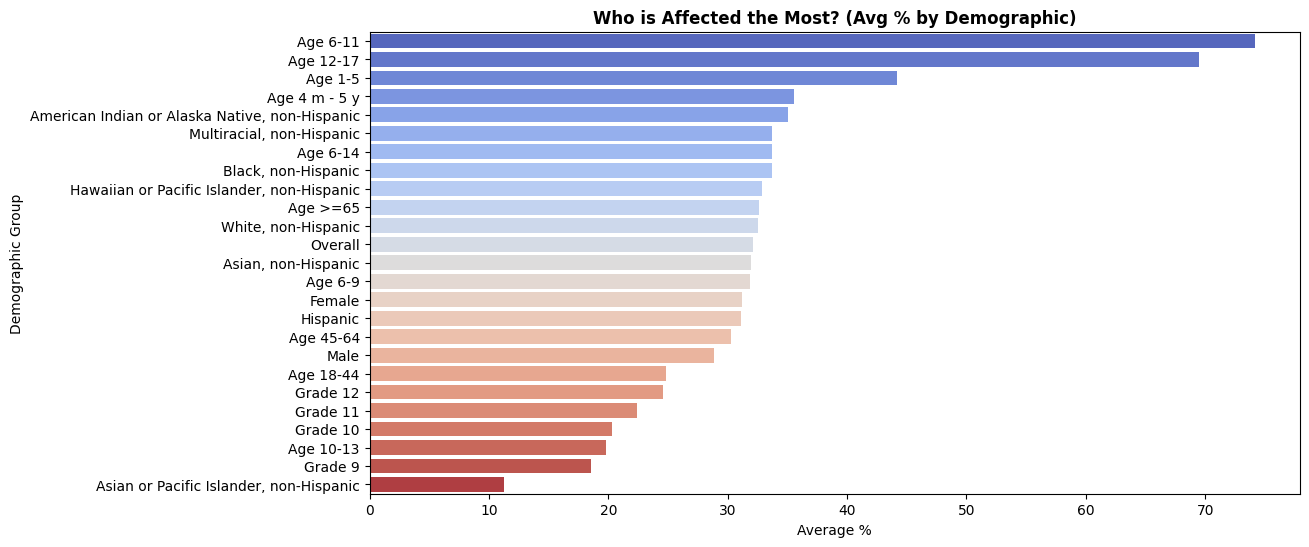

In [48]:
avg_percent_by_demo = df_percent.groupby('DemographicCategory')['DataValue'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_percent_by_demo.values, y=avg_percent_by_demo.index, palette='coolwarm')
plt.title('Who is Affected the Most? (Avg % by Demographic)', weight='bold')
plt.xlabel('Average %')
plt.ylabel('Demographic Group')
plt.show()


#  Which states reported the most overall?

C:\Users\shahn\AppData\Local\Temp\ipykernel_15068\1403275034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='Set2')


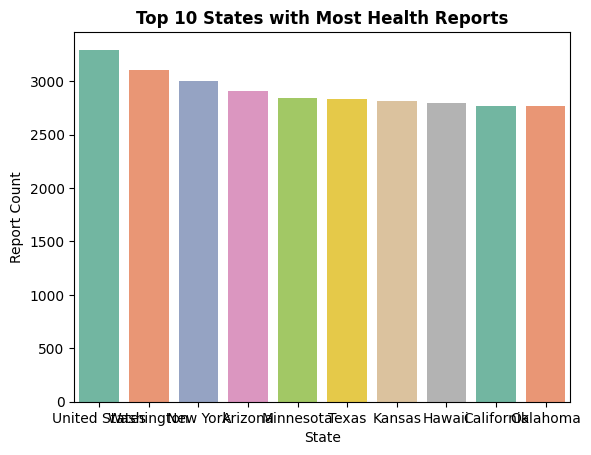

In [49]:
state_counts = df_clean['LocationDesc'].value_counts().head(10)

sns.barplot(x=state_counts.index, y=state_counts.values, palette='Set2')
plt.title('Top 10 States with Most Health Reports', weight='bold')
plt.xlabel('State')
plt.ylabel('Report Count')
plt.show()


# What’s the trend of health concerns in terms of percentage?


C:\Users\shahn\AppData\Local\Temp\ipykernel_15068\1795347052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_percent_by_topic.values, y=avg_percent_by_topic.index, palette='mako')


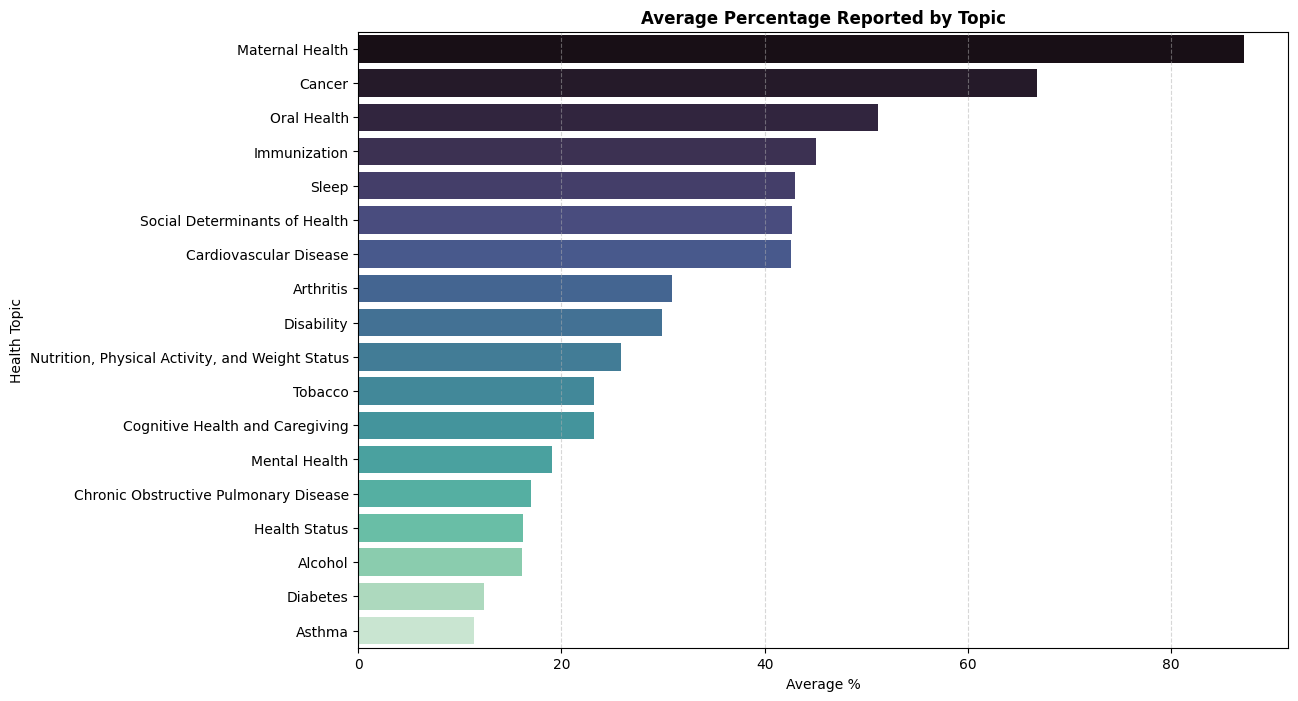

In [50]:
avg_percent_by_topic = df_percent.groupby('Topic')['DataValue'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=avg_percent_by_topic.values, y=avg_percent_by_topic.index, palette='mako')
plt.title('Average Percentage Reported by Topic', weight='bold')
plt.xlabel('Average %')
plt.ylabel('Health Topic')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


# Correlation Heatmap (How variables relate to each other)

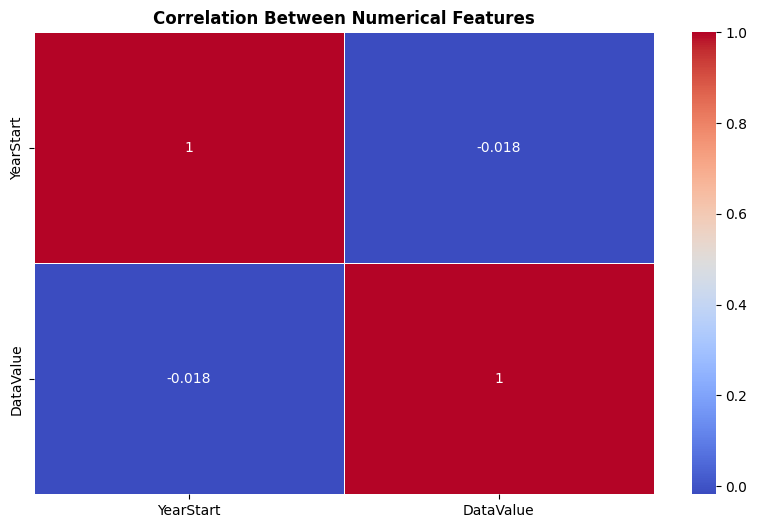

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Numerical Features", weight='bold')
plt.show()